# PROBLEM 2

## (A) Load the dataset **Auto-cleaned.csv**. Plot a best fit line (simple linear regression) on a horsepower vs fuel economy scatter plot. Does the data suggest fuel economy increase or decreases as engine horsepower increases?

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from seaborn import regplot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../Auto-cleaned.csv")

In [3]:
df = df[['horsepower','mpg']]

In [4]:
df.head()

,horsepower,mpg
0,130.0,18.0
1,165.0,15.0
2,150.0,18.0
3,150.0,16.0
4,140.0,17.0


C:\Users\rileyma\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


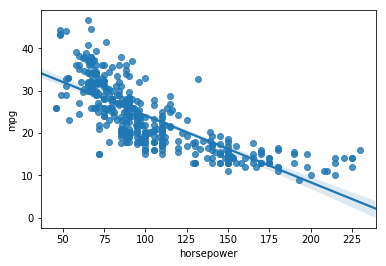

In [5]:
regplot(x='horsepower',y='mpg',data=df)

The data set suggests that fuel economy decreases as engine horesepower increases.

## (B) Use simple linear regression (regression using a single feature) and a 80%-20% trainin-testing data split to compute test MSE. Also establish a baseline MSE and compare to the test MSE. How good is the horsepower-fuel economy regression?

In [6]:
(train,test)  = train_test_split(df,train_size=0.8,test_size=0.2,random_state=0)
feature_train = train.iloc[:,0]
target_train  = train.iloc[:,1]
feature_test  = test.iloc[:,0]
target_test   = test.iloc[:,1]

In [7]:
lr = LinearRegression()
lr.fit(feature_train.values.reshape(-1,1),target_train.values.reshape(-1,1))
y_train = lr.predict(feature_train.values.reshape(-1,1))
y_test  = lr.predict(feature_test.values.reshape(-1,1))
mse_train = mean_squared_error(target_train,y_train)
mse_test  = mean_squared_error(target_test,y_test)
print('MSE train',round(mse_train,3))
print('MSE test ',round(mse_test,3))

MSE train 24.43
MSE test  22.026


In [8]:
print('MSE train (baseline)',round(target_train.var(),3))
print('MSE test  (baseline)',round(target_test.var(),3))

MSE train (baseline) 60.598
MSE test  (baseline) 62.952


In [9]:
y_bar = target_train.mean()
y_baseline = np.tile(y_bar,len(target_test))
print('MSE test (baseline)',round(mean_squared_error(target_test,y_baseline),3))

MSE test (baseline) 62.188


MSE Baseline is 62.188 which is greater than MSE test, which is 22.026. Therefore, regression using horsepower helps improve the prediction of the fuel economy.

## (C) Predict the fuel economy of a vehicle with a 200 horsepower engine.

In [10]:
m = lr.coef_
b = lr.intercept_
y_prediction = m*200 + b 
print(y_prediction)

[[8.27322138]]


A vehicle with 200 horsepower is predicted to have 8.3 mpg

# PROBLEM 3

## Which single chemical feature of wine is most predictice of wine quality? Is this chemical feature the same for red and white wines? To answer these questions, use the datasets *Wine_red.csv* and *Wine_white.csv* and simple linear regression to identify the chemical feature with lowest and the checmial feature with the second lowest test MSE. Are these features the same for red and white wine?

In [11]:
df = pd.read_csv("../Wine_red.csv",sep=';')

In [12]:
(train,test) = train_test_split(df,train_size=0.8,test_size=0.2,random_state=0)
feature_name = []
mse_train = []
mse_test  = []
target_train  = train.iloc[:,-1]
target_test   = test.iloc[:,-1]
for k in range(11):
    feature_name.append(df.columns[k])
    feature_train = train.iloc[:,k]
    feature_test  = test.iloc[:,k]
    lr = LinearRegression()
    lr.fit(feature_train.values.reshape(-1,1),target_train.values.reshape(-1,1))
    y_train = lr.predict(feature_train.values.reshape(-1,1))
    y_test  = lr.predict(feature_test.values.reshape(-1,1))
    mse_train.append(mean_squared_error(target_train,y_train))
    mse_test.append(mean_squared_error(target_test,y_test))
error = pd.DataFrame()
error['feature'] = feature_name
error['train MSE'] = mse_train
error['test MSE']  = mse_test
print('Red Wine')
error.sort_values('test MSE').round(2)

Red Wine


,feature,train MSE,test MSE
10,alcohol,0.52,0.44
1,volatile acidity,0.57,0.50
9,sulphates,0.63,0.54
7,density,0.65,0.55
6,total sulfur dioxide,0.65,0.55
2,citric acid,0.63,0.55
4,chlorides,0.66,0.56
0,fixed acidity,0.66,0.57
8,pH,0.67,0.57
3,residual sugar,0.67,0.58


In [17]:
df = pd.read_csv("../Wine_white.csv",sep=';')
(train,test) = train_test_split(df,train_size=0.8,test_size=0.2,random_state=0)

In [18]:
feature_name = []
mse_train = []
mse_test  = []
target_train  = train.iloc[:,-1]
target_test   = test.iloc[:,-1]
for k in range(11):
    feature_name.append(df.columns[k])
    feature_train = train.iloc[:,k]
    feature_test  = test.iloc[:,k]
    lr = LinearRegression()
    lr.fit(feature_train.values.reshape(-1,1),target_train.values.reshape(-1,1))
    y_train = lr.predict(feature_train.values.reshape(-1,1))
    y_test  = lr.predict(feature_test.values.reshape(-1,1))
    mse_train.append(mean_squared_error(target_train,y_train))
    mse_test.append(mean_squared_error(target_test,y_test))
error = pd.DataFrame()
error['feature'] = feature_name
error['train MSE'] = mse_train
error['test MSE']  = mse_test
print('White Wine')
error.sort_values('test MSE').round(2)

White Wine


,feature,train MSE,test MSE
10,alcohol,0.61,0.73
7,density,0.68,0.82
1,volatile acidity,0.73,0.86
6,total sulfur dioxide,0.73,0.86
4,chlorides,0.72,0.87
0,fixed acidity,0.75,0.87
8,pH,0.75,0.88
3,residual sugar,0.75,0.88
9,sulphates,0.76,0.88
2,citric acid,0.76,0.89


The single chemical feature of wine that is most predictive of wine quality is Alcohol content, for both red and white wine. The second most predictive feature for wine quality is density for white wine and volatile acidity for red wine.